In [256]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats

In [257]:
df = pd.read_csv("https://raw.githubusercontent.com/ajkam/schulich_data_science/main/Final_Prep/Insurance_Company_Complaints__Resolutions__Status__and_Recoveries.csv")

In [258]:
df.head()

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status
0,"Anthem Health Plans, Inc",7045593,05/31/2022,06/02/2022,Group,Health Only,Claim Handling,Medically Necessary,Company Position Substantiated,Company Position Upheld,0.00,Closed
1,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,Health Only,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
2,"Anthem Health Plans, Inc",7044860,05/03/2022,06/02/2022,A & H,Health Only,Claim Handling,Denial,Claim Settled,Claim Paid,147.58,Closed
3,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,A & H,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
4,"Anthem Health Plans, Inc",7052007,02/23/2023,03/17/2023,A & H,A & H,Marketing & Sales,Duplicate Coverage,Compromised Settlement/Resolution,Premium Refund,2179.32,Closed


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38267 entries, 0 to 38266
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      38267 non-null  object 
 1   File No.     38267 non-null  int64  
 2   Opened       38267 non-null  object 
 3   Closed       37304 non-null  object 
 4   Coverage     35827 non-null  object 
 5   SubCoverage  29307 non-null  object 
 6   Reason       35650 non-null  object 
 7   SubReason    35650 non-null  object 
 8   Disposition  22979 non-null  object 
 9   Conclusion   21173 non-null  object 
 10  Recovery     38267 non-null  float64
 11  Status       38267 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.5+ MB


In [260]:
df.describe()

,File No.,Recovery
count,3.826700e+04,38267.000000
mean,7.032932e+06,1731.634862
std,1.890661e+04,15224.331603
min,7.000002e+06,0.000000
25%,7.013760e+06,0.000000
50%,7.042086e+06,0.000000
75%,7.049744e+06,0.000000
max,7.056168e+06,843825.850000


In [261]:
df.isna().sum()

Company            0
File No.           0
Opened             0
Closed           963
Coverage        2440
SubCoverage     8960
Reason          2617
SubReason       2617
Disposition    15288
Conclusion     17094
Recovery           0
Status             0
dtype: int64

In [262]:
missing_proportion = df.isna().sum() / len(df)
print(missing_proportion)


Company        0.000000
File No.       0.000000
Opened         0.000000
Closed         0.025165
Coverage       0.063763
SubCoverage    0.234144
Reason         0.068388
SubReason      0.068388
Disposition    0.399509
Conclusion     0.446703
Recovery       0.000000
Status         0.000000
dtype: float64


In [263]:
print(df['Closed'].unique())


['06/02/2022' '03/17/2023' '05/02/2023' ... '08/26/2019' '04/10/2021'
 '07/08/2019']


In [264]:
df=df.dropna(subset=['Closed'])


In [265]:
df.isna().sum()

Company            0
File No.           0
Opened             0
Closed             0
Coverage        2273
SubCoverage     8628
Reason          2436
SubReason       2436
Disposition    14420
Conclusion     16248
Recovery           0
Status             0
dtype: int64

In [266]:
print(df['Coverage'].unique())


['Group' 'A & H' 'Individual' 'Individual Private Passenger' nan
 'Homeowners' 'Commercial Multi-Peril' 'Individual Life' 'Travel' 'Title'
 'General' 'Motorhome' 'Commercial' 'Pet Insurance' 'Umbrella'
 'Individual Annuities' "Workers' Compensation" 'Group Life' 'Motorcycle'
 'Condo/Townhome' 'Professional/E&O' 'Life and Annuity'
 'Extended Warranty & Service Contracts' 'Extended Warranty'
 'Inland Marine' 'Watercraft' 'Auto Warranty' 'Credit Accident & Health'
 'Renter/Tenants' 'Fidelity & Surety' 'Group Private Passenger' 'IRA'
 'Fire, Allied Lines' 'Dwelling Fire' 'Other [Enter Coverage]'
 'Federal Flood' 'Mobile Homeowner' 'Crop/Hail' 'Group Annuities'
 'Farm owner/Ranch owner' 'Rental' 'Credit Life'
 'Portable Electronics Ins' 'Unknown' 'Ocean Marine' 'Federal Programs'
 "Builder's Risk" 'Portable Electronics' 'Credit Property'
 'Business Interruption' 'Motorsport' 'Products' 'Aircraft'
 'Directors & Officers']


In [267]:
df=df.dropna(subset=['Coverage'])


In [268]:
print(df['SubCoverage'].unique())


['Health Only' 'A & H' 'Long Term Care' 'Collision' 'Homeowners'
 'Health Exchange' 'Fire - Real Property' nan 'Hazard'
 'Rental Reimbursement' 'Medicare Supplement Plan G' 'Condo Association'
 'Medicare Supplement(Policies or Certs)' 'Liability' 'Comprehensive'
 'Term' 'Fixed' 'Self Funded/ERISA' 'Exchange' 'Dental' 'HMO'
 'Surplus Lines' 'Pollution' 'Medicare Prescription Drug/Part D'
 'Medicare' 'Prescription' 'Medicare Advantage' 'Mental Health'
 'Universal' 'Whole Life' 'Windstorm' 'Dental Exchange' 'Physical Damage'
 'Excess Loss' 'Exchange-Individual Health' 'Personal Umbrella'
 'Short Term Medical' 'Disability Income' 'Accidental Only'
 'Limited Benefits' 'Commercial Multi-Peril' 'Medicare Supplement Plan J'
 'Back up Sewer/Sump Pump' 'Pharmacy Benefits' 'Small Group' 'Vision'
 'Commercial Auto' 'Unknown' 'Medicare Supplement Plan F' 'Student Health'
 'Personal Property' 'Variable' 'Other' 'Flood' 'Large Group' 'Mold'
 'Tenant Homeowners' 'Medical Payments' 'Limited Benefit Hea

In [269]:
df['SubCoverage']=df['SubCoverage'].fillna("No_SubCoverage")

In [270]:
df.isna().sum()

Company            0
File No.           0
Opened             0
Closed             0
Coverage           0
SubCoverage        0
Reason           360
SubReason        360
Disposition    12222
Conclusion     14077
Recovery           0
Status             0
dtype: int64

In [271]:
print(df['Reason'].unique())


['Claim Handling' 'Marketing & Sales' 'PolicyHolder Service'
 'Underwriting' nan]


In [272]:
print(df['Reason'].mode())


0    Claim Handling
Name: Reason, dtype: object


<Axes: xlabel='Reason', ylabel='Count'>

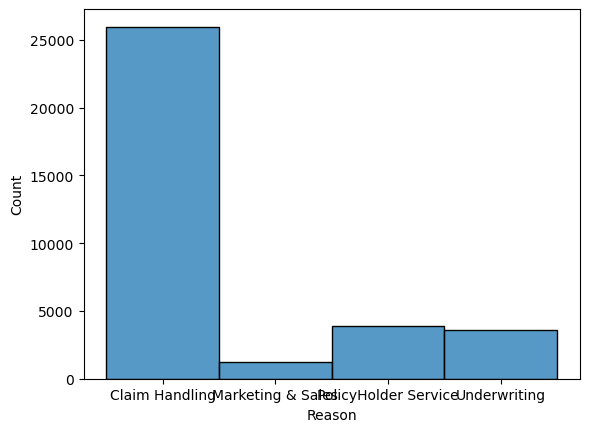

In [273]:
sns.histplot(df['Reason'])

In [274]:
df['Reason']=df['Reason'].fillna("Claim Handling")

<Axes: xlabel='Reason', ylabel='Count'>

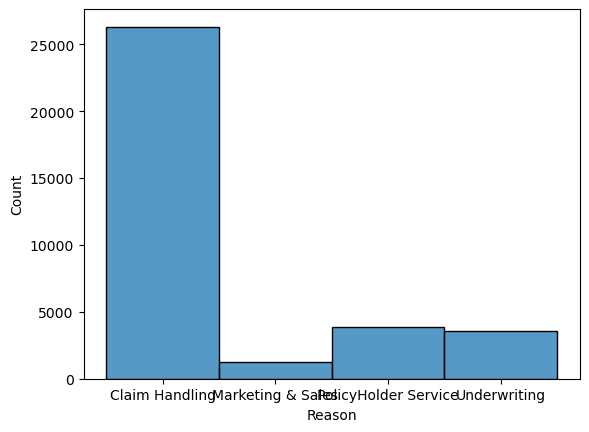

In [275]:
sns.histplot(df['Reason'])

In [276]:
print(df['SubReason'].unique())


['Medically Necessary' 'Provider Contract Issue' 'Denial'
 'Duplicate Coverage' 'Premium/Notice' 'Claim Denial'
 'Unsatisfactory Settlement/Offer' 'Surprise Billing' 'Claim Delays'
 'External Review' 'Other' 'Medical Necessity' 'UR Case Management'
 'Medical Necessity Denial' 'UR MEDICALLY NECESSARY DENIAL'
 'CPT Code Issue' 'Claim Handling Other' 'Adjuster Handling'
 'Excessive Charges' 'Duplication of Coverage' 'Policy Information'
 'Coverage Question' 'Claim Delay' 'Unsatisfactory Settlement'
 'Cancellation' 'Premium & Rating' 'Storage Fees'
 'Unlicensed Adjuster/Appraiser' 'UR Procedure' 'Unsatisfactory Offer'
 'Internal Appeal' 'Marketing/Sales other' 'Nonrenewal' 'Claim Procedure'
 'Premiums Misquoted' 'Co-pay, Deductible, and Co-Insurance Issues'
 'Eligibility of Provider' 'Delays/No Response' 'Misleading Advertising'
 'Loss of Use' 'Policy Service Delay by Insurer' 'Credentialing Delay'
 'Policy Service Other' 'Premium Refund Delay' 'Premium Notice/Billing'
 'Coordination of Be

In [277]:
df=df.dropna(subset=['SubReason'])


In [278]:
df.isna().sum()

Company            0
File No.           0
Opened             0
Closed             0
Coverage           0
SubCoverage        0
Reason             0
SubReason          0
Disposition    12081
Conclusion     13748
Recovery           0
Status             0
dtype: int64

<Axes: xlabel='Disposition', ylabel='Count'>

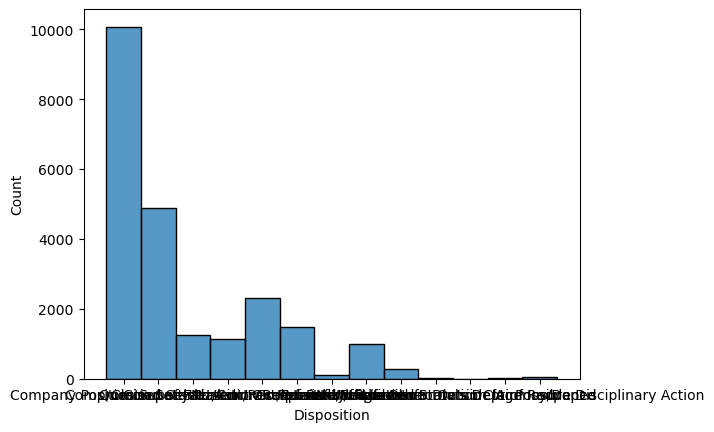

In [279]:
sns.histplot(df['Disposition'])

In [280]:
df=df.dropna(subset=['Disposition'])


<Axes: xlabel='Conclusion', ylabel='Count'>

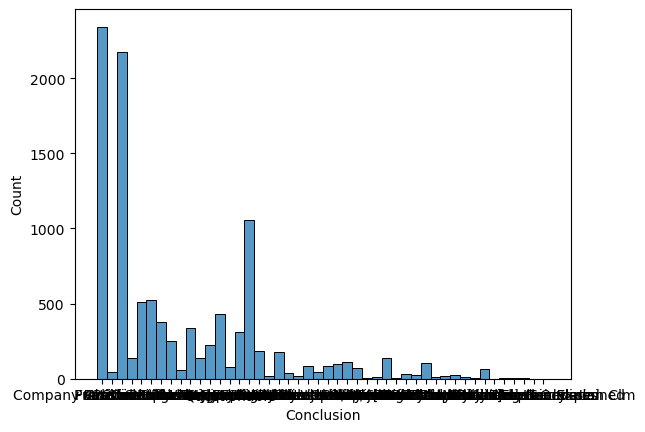

In [281]:
sns.histplot(df['Conclusion'])

In [282]:
df=df.dropna(subset=['Conclusion'])


In [283]:
df.isna().sum()

Company        0
File No.       0
Opened         0
Closed         0
Coverage       0
SubCoverage    0
Reason         0
SubReason      0
Disposition    0
Conclusion     0
Recovery       0
Status         0
dtype: int64

In [284]:
df.describe()

,File No.,Recovery
count,1.041200e+04,10412.000000
mean,7.045145e+06,2209.166722
std,1.143168e+04,15287.719055
min,7.000149e+06,0.000000
25%,7.043138e+06,0.000000
50%,7.048155e+06,0.000000
75%,7.051456e+06,183.800000
max,7.055852e+06,422799.970000


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10412 entries, 0 to 38262
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      10412 non-null  object 
 1   File No.     10412 non-null  int64  
 2   Opened       10412 non-null  object 
 3   Closed       10412 non-null  object 
 4   Coverage     10412 non-null  object 
 5   SubCoverage  10412 non-null  object 
 6   Reason       10412 non-null  object 
 7   SubReason    10412 non-null  object 
 8   Disposition  10412 non-null  object 
 9   Conclusion   10412 non-null  object 
 10  Recovery     10412 non-null  float64
 11  Status       10412 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.0+ MB


<Axes: >

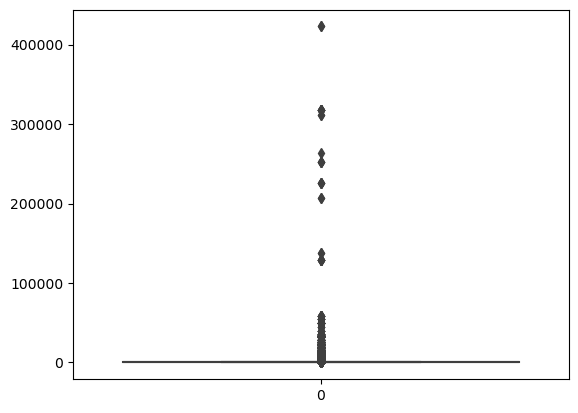

In [286]:
sns.boxplot(df['Recovery'])

In [287]:
print(scipy.stats.skew(df['Recovery']))
print(scipy.stats.kurtosis(df['Recovery'], fisher=True))


17.022565071146843
343.9542239323604


In [288]:
df.drop(df[df['Recovery']>100000].index, axis=0, inplace=True)


<Axes: >

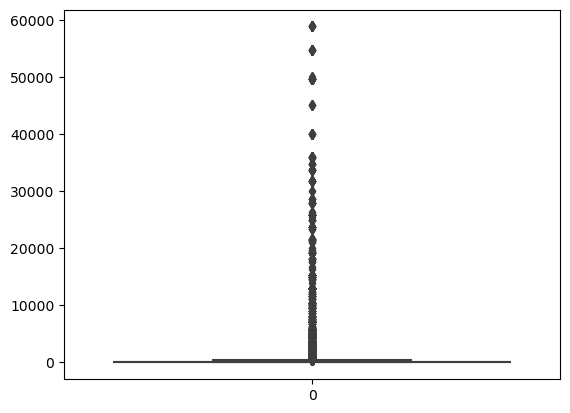

In [289]:
sns.boxplot(df['Recovery'])

In [290]:
df.drop_duplicates(inplace=True)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10345 entries, 0 to 38262
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      10345 non-null  object 
 1   File No.     10345 non-null  int64  
 2   Opened       10345 non-null  object 
 3   Closed       10345 non-null  object 
 4   Coverage     10345 non-null  object 
 5   SubCoverage  10345 non-null  object 
 6   Reason       10345 non-null  object 
 7   SubReason    10345 non-null  object 
 8   Disposition  10345 non-null  object 
 9   Conclusion   10345 non-null  object 
 10  Recovery     10345 non-null  float64
 11  Status       10345 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.0+ MB


In [292]:
def money(x):
    if x > 0 :
        return 'MADE MONEY'
    else:
        return 'NO MONEY'

In [293]:
df['MONEY']= df['Recovery'].apply(money)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10345 entries, 0 to 38262
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      10345 non-null  object 
 1   File No.     10345 non-null  int64  
 2   Opened       10345 non-null  object 
 3   Closed       10345 non-null  object 
 4   Coverage     10345 non-null  object 
 5   SubCoverage  10345 non-null  object 
 6   Reason       10345 non-null  object 
 7   SubReason    10345 non-null  object 
 8   Disposition  10345 non-null  object 
 9   Conclusion   10345 non-null  object 
 10  Recovery     10345 non-null  float64
 11  Status       10345 non-null  object 
 12  MONEY        10345 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [295]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score
     

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import f_oneway
from sklearn.ensemble import GradientBoostingClassifier


In [297]:
df

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status,MONEY
0,"Anthem Health Plans, Inc",7045593,05/31/2022,06/02/2022,Group,Health Only,Claim Handling,Medically Necessary,Company Position Substantiated,Company Position Upheld,0.00,Closed,NO MONEY
1,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,Health Only,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed,MADE MONEY
2,"Anthem Health Plans, Inc",7044860,05/03/2022,06/02/2022,A & H,Health Only,Claim Handling,Denial,Claim Settled,Claim Paid,147.58,Closed,MADE MONEY
3,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,A & H,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed,MADE MONEY
4,"Anthem Health Plans, Inc",7052007,02/23/2023,03/17/2023,A & H,A & H,Marketing & Sales,Duplicate Coverage,Compromised Settlement/Resolution,Premium Refund,2179.32,Closed,MADE MONEY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38238,Cigna Health and Life Insurance Company,7047624,08/31/2022,09/29/2022,Group,A & H,Claim Handling,Claim Delay,Claim Settled,Provider Issue,15373.80,Closed,MADE MONEY
38244,Esurance Insurance Company,7016374,08/29/2018,09/19/2018,Individual Private Passenger,Liability,Claim Handling,Actual Cash Value Dispute,Company Position Substantiated,Corrective Action,252.78,Closed,MADE MONEY
38250,Mid-Century Insurance Company,7014018,12/11/2018,12/24/2018,Individual Private Passenger,No_SubCoverage,Underwriting,Cancellation,Compromised Settlement/Resolution,Satisfactory Explanation,0.00,Closed,NO MONEY
38253,Selective Insurance Company of America,7046479,07/13/2022,08/25/2022,Individual Private Passenger,Liability,Claim Handling,Claim Delays,Company Position Substantiated,Company Position Upheld,0.00,Closed,NO MONEY


In [298]:
total_count = df['MONEY'].count()


made_money_count = df[df['MONEY'] == 'MADE MONEY']['MONEY'].count()
no_money_count = df[df['MONEY'] == 'NO MONEY']['MONEY'].count()


made_money_proportion = made_money_count / total_count
no_money_proportion = no_money_count / total_count

print("Made Money Proportion:", made_money_proportion)
print("No Money Proportion:", no_money_proportion)

Made Money Proportion: 0.2935717738037699
No Money Proportion: 0.70642822619623


Coverage    SubCoverage   Reason Company     SubReason are the most important to predict Money

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10345 entries, 0 to 38262
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      10345 non-null  object 
 1   File No.     10345 non-null  int64  
 2   Opened       10345 non-null  object 
 3   Closed       10345 non-null  object 
 4   Coverage     10345 non-null  object 
 5   SubCoverage  10345 non-null  object 
 6   Reason       10345 non-null  object 
 7   SubReason    10345 non-null  object 
 8   Disposition  10345 non-null  object 
 9   Conclusion   10345 non-null  object 
 10  Recovery     10345 non-null  float64
 11  Status       10345 non-null  object 
 12  MONEY        10345 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [300]:
threshold = 10  # Adjust this threshold as needed

# Calculate the counts of each company
company_counts = df['Company'].value_counts()

# Get the companies to drop based on the threshold
companies_to_drop = company_counts[company_counts < threshold].index

# Remove rows with companies that have counts below the threshold
df = df[~df['Company'].isin(companies_to_drop)]

# Print the modified DataFrame
print(df)

                                       Company  File No.      Opened  \
0                     Anthem Health Plans, Inc   7045593  05/31/2022   
1                     Anthem Health Plans, Inc   7043381  02/28/2022   
2                     Anthem Health Plans, Inc   7044860  05/03/2022   
3                     Anthem Health Plans, Inc   7043381  02/28/2022   
4                     Anthem Health Plans, Inc   7052007  02/23/2023   
...                                        ...       ...         ...   
38225            Gerber Life Insurance Company   7049735  11/29/2022   
38233              ConnectiCare Benefits, Inc.   7049034  10/31/2022   
38234    Combined Insurance Company of America   7045449  05/23/2022   
38238  Cigna Health and Life Insurance Company   7047624  08/31/2022   
38244               Esurance Insurance Company   7016374  08/29/2018   

           Closed                      Coverage        SubCoverage  \
0      06/02/2022                         Group        Health Onl

In [301]:
X = df.drop('MONEY', axis=1)
y = df['MONEY']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

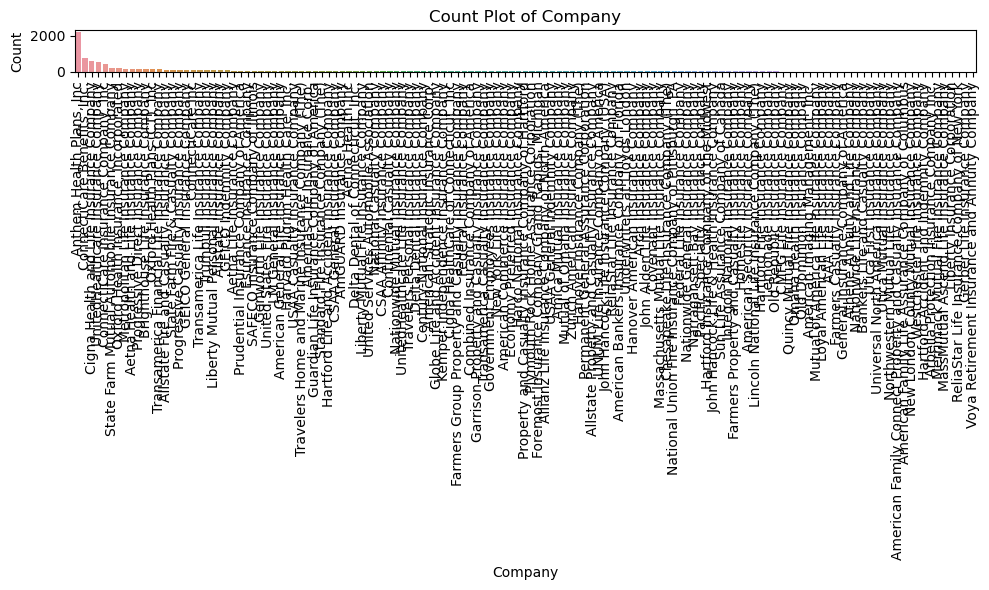

In [302]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Company', order=df['Company'].value_counts().index)
plt.title('Count Plot of Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()

In [303]:
company_counts = df['Company'].value_counts()

# Check for companies with count of 0
companies_with_zero_count = company_counts[company_counts == 0].index

# Print the result
if len(companies_with_zero_count) > 0:
    print("Companies with a count of 0:")
    for company in companies_with_zero_count:
        print(company)
else:
    print("All companies have a non-zero count.")

All companies have a non-zero count.


In [304]:
unknown_companies = [
    'Colony Insurance Company', 'The Burlington Insurance Company',
    'Unity Financial Life Insurance Company', 'Infinity Standard Insurance Company',
    'Nationwide Agribusiness Insurance Company', 'Utica National Insurance Company of Ohio',
    'Security Benefit Life Insurance Company', 'Connecticut FAIR Plan',
    'AIX Specialty Insurance Company', 'Arch Specialty Insurance Company',
    'Electric Insurance Company', 'Utica National Insurance Company of Texas',
    'Farmington Casualty Company', 'Wellfleet Insurance Company',
    'TypTap Insurance Company', 'Cincinnati Specialty Underwriters Insurance Company',
    'Royal Arcanum Supreme Council', 'HDI Global Insurance Company',
    'National Interstate Insurance Company'
]

unknown_company_counts = df['Company'].loc[df['Company'].isin(unknown_companies)].value_counts()

# Print the count of each unknown company
for company, count in unknown_company_counts.items():
    print(f"Company: {company}, Count: {count}")

In [305]:
print(df['Company'].unique())


['Anthem Health Plans, Inc' 'UnitedHealthcare Insurance Company'
 'Continental Casualty Company' 'Nationwide Mutual Insurance Company'
 'Transamerica Casualty Insurance Company'
 'Farmers Property and Casualty Insurance Company'
 'Federal Insurance Company' 'Century-National Insurance Company'
 'Progressive Direct Insurance Company' 'Allstate Insurance Company'
 'Cigna Health and Life Insurance Company'
 'American General Life Insurance Company'
 'GEICO General Insurance Company'
 'Liberty Mutual Personal Insurance Company'
 'Omaha Health Insurance Company' 'ConnectiCare Insurance Company, Inc'
 'Merrimack Mutual Fire Insurance Company'
 'Transamerica Life Insurance Company' 'ConnectiCare Benefits, Inc.'
 'American Imaging Management, Inc.'
 'Transamerica Financial Life Insurance Company'
 'SAFECO Insurance Company of Illinois' 'CSAA Affinity Insurance Company'
 'State Farm Fire & Casualty Company'
 'Aetna Health and Life Insurance Company'
 'Farmers Group Property and Casualty Insuran

In [306]:

# Define the categorical columns
categorical_cols = ['Company', 
                    'Reason', 'Disposition','Status']

# Define the numerical columns
numerical_cols = ['File No.', 'Recovery']

# Create preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

preprocessor.fit(X_train)

# Combine train and test data for preprocessing
combined_data = pd.concat([X_train, X_test])
combined_data_transformed = preprocessor.transform(combined_data)
X_train_transformed = combined_data_transformed[:len(X_train)]
X_test_transformed = combined_data_transformed[len(X_train):]


In [310]:



# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC()),
    ('KNearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB())
]

X_train_dense = X_train_transformed.toarray()
X_test_dense = X_test_transformed.toarray()

# Loop through each model and train
for name, model in models:
    clf = Pipeline(steps=[('classifier', model)])
    clf.fit(X_train_dense, y_train)
    y_pred = clf.predict(X_test_dense)


        # Calculate and display evaluation metrics
    print(f"Model: {name}")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='MADE MONEY')
    recall = recall_score(y_test, y_pred, pos_label='MADE MONEY')
    f1 = f1_score(y_test, y_pred, pos_label='MADE MONEY')
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n")

Model: Logistic Regression
Accuracy: 0.9695024077046549
Precision: 0.9649122807017544
Recall: 0.9369676320272572
F1-Score: 0.9507346585998272
Confusion Matrix:
 [[ 550   37]
 [  20 1262]]


Model: Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[ 587    0]
 [   0 1282]]


Model: Support Vector Machine
Accuracy: 0.951310861423221
Precision: 0.8887147335423198
Recall: 0.9659284497444633
F1-Score: 0.9257142857142857
Confusion Matrix:
 [[ 567   20]
 [  71 1211]]


Model: KNearest Neighbors
Accuracy: 0.976457998929909
Precision: 0.9656946826758147
Recall: 0.959114139693356
F1-Score: 0.9623931623931624
Confusion Matrix:
 [[ 563   24]
 [  20 1262]]


Model: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[ 587    0]
 [   0 1282]]


Model: Gradient Boosting
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[ 587    0]
 [   0 1282]]


Model: Naive Bayes
Accuracy: 0.48796147672552165
Precis

In [312]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Adjust the range as needed
    'max_depth': [None, 10, 20],  # Adjust the range as needed
    'min_samples_split': [2, 5, 10],  # Adjust the range as needed
    # Add more hyperparameters to the grid as needed
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_transformed, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.999866220735786


In [314]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': stats.randint(50, 200),  # Adjust the range as needed
    'max_depth': [None, 10, 20],  # Adjust the range as needed
    'min_samples_split': stats.randint(2, 11),  # Adjust the range as needed
    # Add more hyperparameters to the distribution as needed
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_transformed, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 142}
Best Accuracy: 0.999866220735786


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# List of categorical columns
categorical_cols = ['Company', 'Opened', 'Closed', 'Coverage', 'SubCoverage', 
                    'Reason', 'SubReason', 'Disposition', 'Conclusion', 'Status']

# Create a OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)  # 'drop' parameter avoids multicollinearity

# Create a ColumnTransformer to apply the encoder to specific columns
preprocessor = ColumnTransformer(transformers=[('cat', encoder, categorical_cols)],
                                 remainder='passthrough')  # Pass through non-categorical columns

# Transform your data
X_encoded = preprocessor.fit_transform(df.drop('MONEY', axis=1))  # Assuming 'MONEY' is the target column

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['File No.', 'Recovery']] = scaler.fit_transform(df[['File No.', 'Recovery']])

from sklearn.model_selection import train_test_split

X = df.drop('MONEY', axis=1)
y = df['MONEY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC()),
    ('KNearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB())]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC()),
    ('KNearest Neighbors', KNeighborsClassifier())
]

for name, model in models:
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Step 5: Evaluate the models
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("---------------------")
    # Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='MADE MONEY')  # Adjust pos_label as needed
recall = recall_score(y_test, y_pred, pos_label='MADE MONEY')  # Adjust pos_label as needed
f1 = f1_score(y_test, y_pred, pos_label='MADE MONEY')  # Adjust pos_label as needed
conf_matrix = confusion_matrix(y_test, y_pred)
for name, model in models:
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
   print(f"Model: {name}")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='MADE MONEY')
    recall = recall_score(y_test, y_pred, pos_label='MADE MONEY')
    f1 = f1_score(y_test, y_pred, pos_label='MADE MONEY')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n")

Company_dummies = pd.get_dummies(df['Company'])
Opened_dummies = pd.get_dummies(df['Opened'])
Closed_dummies = pd.get_dummies(df['Closed'])
Coverage_dummies = pd.get_dummies(df['Coverage'])
SubCoverage_dummies = pd.get_dummies(df['SubCoverage'])
Reason_dummies = pd.get_dummies(df['Reason'])
SubReason_dummies = pd.get_dummies(df['SubReason'])
Disposition_dummies = pd.get_dummies(df['Disposition'])
Conclusion_dummies = pd.get_dummies(df['Conclusion'])
Status_dummies = pd.get_dummies(df['Status'])
df = pd.concat([df,Company_dummies,Opened_dummies,Closed_dummies,Coverage_dummies,SubCoverage_dummies,Reason_dummies,SubReason_dummies,Disposition_dummies,Conclusion_dummies,Status_dummies
],axis=1)

log = LogisticRegression()
log.fit(df[['Company', 'File No.', 'Opened', 'Closed',
       'Coverage', 'SubCoverage', 'Reason',
       'SubReason', 'Disposition', 'Conclusion', 'Status']], df['MONEY'])
       pred = log.predict(df